In [1]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [3]:
from IPython.display import display, Image, Audio
import os

os.environ['OPENAI_API_KEY']='your openai token'
import base64
import time
from openai import OpenAI
import os
import requests

client = OpenAI()

In [5]:
import base64
from PIL import Image

def image_to_base64(image_path):
    try:
        with open(image_path, "rb") as image_file:
            # Read the image file
            image_data = image_file.read()
            
            # Encode the image data to base64
            base64_encoded = base64.b64encode(image_data).decode("utf-8")
            
            return base64_encoded
    except Exception as e:
        print(f"Error: {e}")
        return None

# Replace 'path/to/your/image.jpg' with the actual path to your image file
image_path = 'Screenshot 2023-06-05 at 1.14.36 PM.png'
base64_string = image_to_base64(image_path)

# if base64_string:
#     print("Base64 Encoded Image:")
#     print(base64_string)

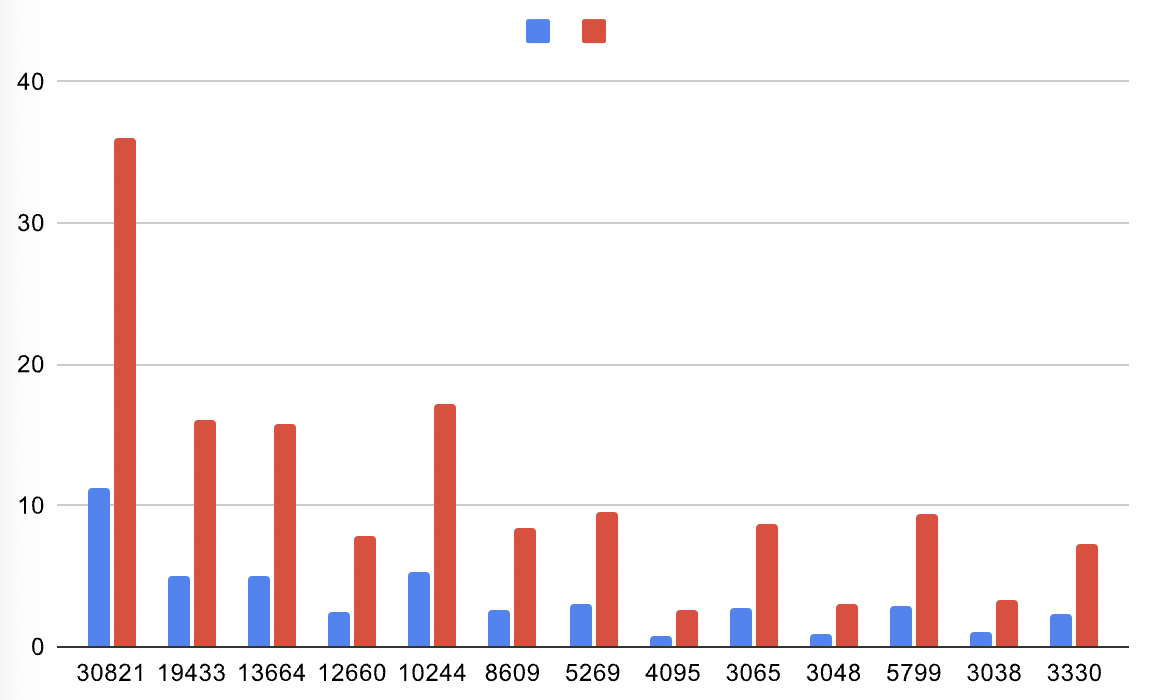

In [6]:
from io import BytesIO
image_data = base64.b64decode(base64_string)
        
# Create a BytesIO object to handle the image data
image_buffer = BytesIO(image_data)

# Open the image using PIL
image = Image.open(image_buffer)
image

In [8]:

PROMPT_MESSAGES = [{"role": "system", "content": "you a image analysis bot"},
    {
        "role": "user",
        "content": [
            "explain image",
            *map(lambda x: {"image": x, "resize": 256}, [base64_string]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)


The image shows a bar chart with two sets of data, represented by bars in two different colors—red and blue. The horizontal axis (x-axis) has numerical values, which likely represent categories or groups. These values are as follows: 30821, 19433, 13664, 12660, 10244, 8609, 5269, 4095, 3065, 3048, 5799, 3038, and 3330. Without knowing the context, we can't be certain what these numbers stand for, but they could be identifiers like product numbers, zip codes, or any other numerical categorization.

On the vertical axis (y-axis), there are numbers that increase in increments that are likely representative of a count, quantity, or frequency associated with each category on the x-axis. The scale on the left side of the chart, which pertains to the heights of the bars, goes from 0 to 40 in
